#Análise exploratória de dados da Northwind Traders

O objetivo da análise exploratória de dados (AED) para a Northwind Traders é integrar todos os dados da empresa em um único repositório, identificar padrões e insights valiosos, e apoiar a tomada de decisões estratégicas para aumentar o ticket médio e reduzir o churn.

#Bibliotecas

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data wrangling

* Carregando os datasets que serão usados

In [168]:
orders = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/AnaliseDeDados_Northwind-/main/datasets/orders.csv',sep=';')
order_details = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/AnaliseDeDados_Northwind-/main/datasets/order_details.csv',sep=';')
products = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/AnaliseDeDados_Northwind-/main/datasets/products.csv',sep=';')
categories = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/AnaliseDeDados_Northwind-/main/datasets/categories.csv', sep=';')

* Unindo os DataFrames orders e order_details na coluna em comum 'order_id', dando prioridade as colunas do DataFrame orders

In [169]:
df_orders = pd.merge(orders, order_details, on='order_id',how='left')

df_orders = df_orders[['order_id', 'customer_id', 'employee_id','order_date', 'ship_via', 'freight',
       'ship_city', 'ship_region', 'ship_postal_code', 'ship_country',
       'product_id', 'unit_price', 'quantity', 'discount']]

df_orders['total_price'] = (df_orders['unit_price'] * df_orders['quantity'])*(1-df_orders['discount'])

#criando a coluna ano
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['ano'] = df_orders['order_date'] .dt.year


df_orders.head()

,order_id,customer_id,employee_id,order_date,ship_via,freight,ship_city,ship_region,ship_postal_code,ship_country,product_id,unit_price,quantity,discount,total_price,ano
0,10248,VINET,5,1996-07-04,3,32.38,Reims,NaN,51100,France,11,14.0,12,0.0,168.0,1996
1,10248,VINET,5,1996-07-04,3,32.38,Reims,NaN,51100,France,42,9.8,10,0.0,98.0,1996
2,10248,VINET,5,1996-07-04,3,32.38,Reims,NaN,51100,France,72,34.8,5,0.0,174.0,1996
3,10249,TOMSP,6,1996-07-05,1,11.61,Münster,NaN,44087,Germany,14,18.6,9,0.0,167.4,1996
4,10249,TOMSP,6,1996-07-05,1,11.61,Münster,NaN,44087,Germany,51,42.4,40,0.0,1696.0,1996


* Unindo os DataFrames df_orders e products na coluna em comum 'order_id', dando prioridade as colunas do DataFrame df_orders

In [170]:
df_orders = pd.merge(df_orders, products, on='product_id',how='left')

In [171]:
df_orders = df_orders[['order_id', 'customer_id', 'employee_id', 'order_date','ano', 'ship_via', 'freight',
       'ship_city', 'ship_region', 'ship_postal_code', 'ship_country',
       'product_id', 'unit_price_x', 'quantity', 'discount', 'total_price',
       'product_name', 'supplier_id', 'category_id']]

In [172]:
df_orders.rename(columns={'unit_price_x':'unit_price'}, inplace=True)

df_orders.head()

,order_id,customer_id,employee_id,order_date,ano,ship_via,freight,ship_city,ship_region,ship_postal_code,ship_country,product_id,unit_price,quantity,discount,total_price,product_name,supplier_id,category_id
0,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,France,11,14.0,12,0.0,168.0,Queso Cabrales,5,4
1,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,France,42,9.8,10,0.0,98.0,Singaporean Hokkien Fried Mee,20,5
2,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,France,72,34.8,5,0.0,174.0,Mozzarella di Giovanni,14,4
3,10249,TOMSP,6,1996-07-05,1996,1,11.61,Münster,NaN,44087,Germany,14,18.6,9,0.0,167.4,Tofu,6,7
4,10249,TOMSP,6,1996-07-05,1996,1,11.61,Münster,NaN,44087,Germany,51,42.4,40,0.0,1696.0,Manjimup Dried Apples,24,7


* Unindo os DataFrames df_orders e categories na coluna em comum 'order_id', dando prioridade as colunas do DataFrame df_orders

In [173]:
df_orders = pd.merge(df_orders, categories, on='category_id',how='left')

In [174]:
df_orders = df_orders[['order_id', 'customer_id', 'employee_id', 'order_date', 'ano', 'ship_via',
       'freight', 'ship_city', 'ship_region', 'ship_postal_code',
       'ship_country', 'product_id', 'unit_price', 'quantity', 'discount',
       'total_price', 'product_name', 'supplier_id', 'category_id',
       'category_name', 'description']]

df_orders.head()

,order_id,customer_id,employee_id,order_date,ano,ship_via,freight,ship_city,ship_region,ship_postal_code,...,product_id,unit_price,quantity,discount,total_price,product_name,supplier_id,category_id,category_name,description
0,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,...,11,14.0,12,0.0,168.0,Queso Cabrales,5,4,Dairy Products,Cheeses
1,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,...,42,9.8,10,0.0,98.0,Singaporean Hokkien Fried Mee,20,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
2,10248,VINET,5,1996-07-04,1996,3,32.38,Reims,NaN,51100,...,72,34.8,5,0.0,174.0,Mozzarella di Giovanni,14,4,Dairy Products,Cheeses
3,10249,TOMSP,6,1996-07-05,1996,1,11.61,Münster,NaN,44087,...,14,18.6,9,0.0,167.4,Tofu,6,7,Produce,Dried fruit and bean curd
4,10249,TOMSP,6,1996-07-05,1996,1,11.61,Münster,NaN,44087,...,51,42.4,40,0.0,1696.0,Manjimup Dried Apples,24,7,Produce,Dried fruit and bean curd


#Vizualisação

In [175]:
df_orders['category_name'].value_counts().head()

category_name
Beverages         404
Dairy Products    366
Confections       334
Seafood           330
Condiments        216
Name: count, dtype: int64

In [176]:
sum_category = pd.DataFrame()

sum_category['Quantity'] = df_orders[['quantity','category_name']].groupby('category_name').agg('sum')
sum_category['Total Price'] = df_orders[['total_price','category_name']].groupby('category_name').agg('sum')

sum_category.sort_values(by='Quantity', ascending=False).head()

,Quantity,Total Price
category_name,,
Beverages,9532,267868.1800
Dairy Products,9149,234507.2850
Confections,7906,167357.2250
Seafood,7681,131261.7375
Condiments,5298,106047.0850


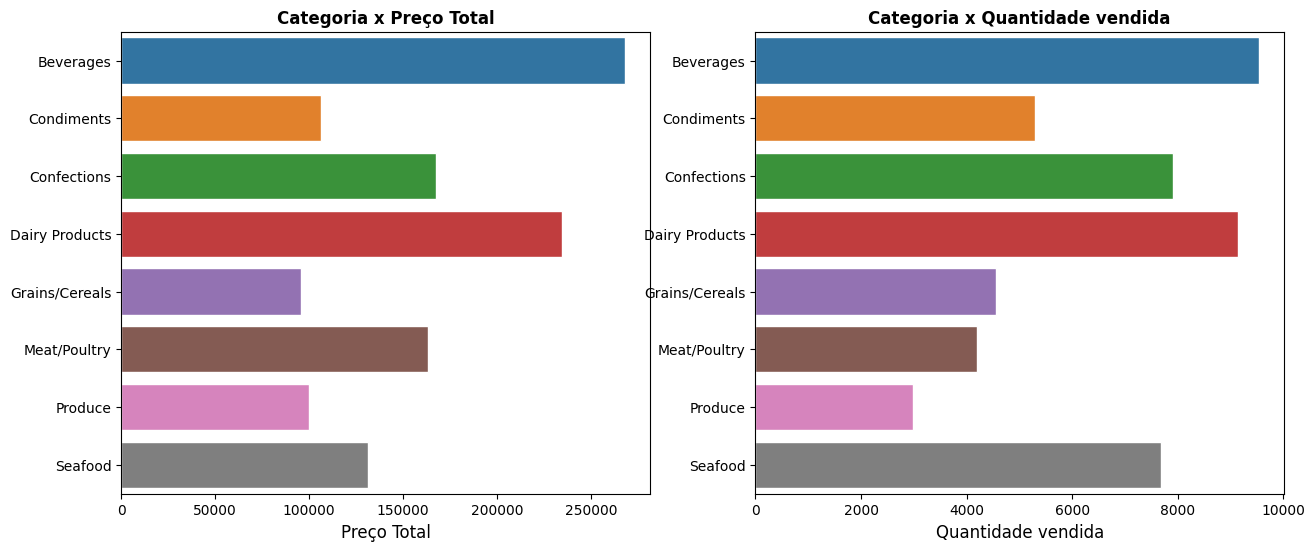

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  graph1 = sns.barplot(sum_category, x='Total Price', y='category_name', hue='category_name',ax=axes[0])

  graph1.set_title('Categoria x Preço Total', fontweight='bold')
  graph1.set_xlabel('Preço Total', fontsize=12)
  graph1.set_ylabel('')


with sns.axes_style('whitegrid'):

  graph2 = sns.barplot(sum_category, x='Quantity', y='category_name', hue='category_name', ax=axes[1])

  graph2.set_title('Categoria x Quantidade vendida', fontweight='bold')
  graph2.set_xlabel('Quantidade vendida', fontsize=12)
  graph2.set_ylabel('')



> As bebidas(Beverages) representam o produto mais vendido em quantidade e apresentou o maior faturamento quando comparado com outros produtos.

In [178]:
sum_product = pd.DataFrame()

sum_product['Quantity'] = df_orders[df_orders['category_name'] == 'Beverages'][['product_name','quantity']].groupby('product_name').agg('sum')
sum_product['Total Price'] = df_orders[df_orders['category_name'] == 'Beverages'][['product_name','total_price']].groupby('product_name').agg('sum')

sum_product.sort_values(by='Quantity', ascending=False).head()

,Quantity,Total Price
product_name,,
Rhönbräu Klosterbier,1155,8177.490
Guaraná Fantástica,1125,4504.365
Chang,1057,16355.960
Lakkalikööri,981,15760.440
Steeleye Stout,883,13644.000


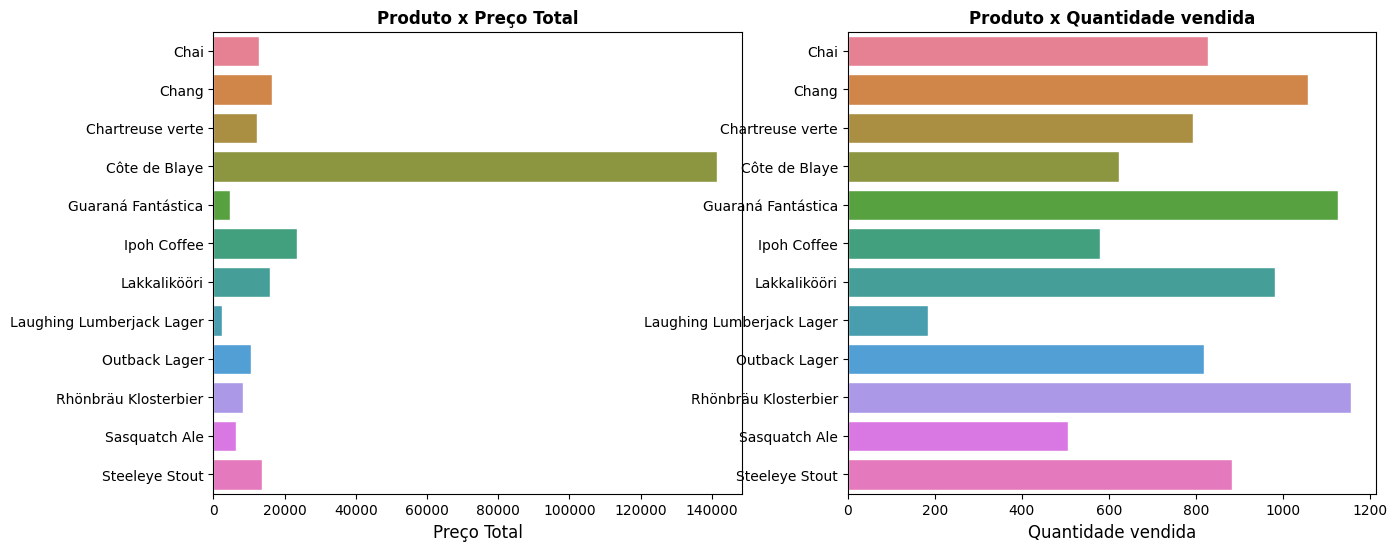

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  graph1 = sns.barplot(sum_product, x='Total Price', y='product_name', hue='product_name',ax=axes[0])

  graph1.set_title('Produto x Preço Total', fontweight='bold')
  graph1.set_xlabel('Preço Total', fontsize=12)
  graph1.set_ylabel('')


with sns.axes_style('whitegrid'):

  graph2 = sns.barplot(sum_product, x='Quantity', y='product_name', hue='product_name', ax=axes[1])

  graph2.set_title('Produto x Quantidade vendida', fontweight='bold')
  graph2.set_xlabel('Quantidade vendida', fontsize=12)
  graph2.set_ylabel('')


> A bebida que gera o maior faturamento é disparado a "Côte de Blaye", já quantidade de produtos vendidos é mais homogênea, a mais vendida é a "Rhönbräu Klosterbier "e logo em seguida, com 30 vendas a menos, temos a "Guaraná Fantástica".

In [180]:
df_orders['ship_country'].value_counts().head()

ship_country
USA        352
Germany    328
Brazil     203
France     184
UK         135
Name: count, dtype: int64

In [181]:
sum_country = pd.DataFrame()

sum_country['Quantity'] = df_orders[['quantity','ship_country']].groupby('ship_country').agg('sum')
sum_country['Total Price'] = df_orders[['total_price','ship_country']].groupby('ship_country').agg('sum')

sum_country.sort_values(by='Quantity', ascending=False).head()

,Quantity,Total Price
ship_country,,
USA,9330,245584.6105
Germany,9213,230284.6335
Austria,5167,128003.8385
Brazil,4247,106925.7765
France,3254,81358.3225


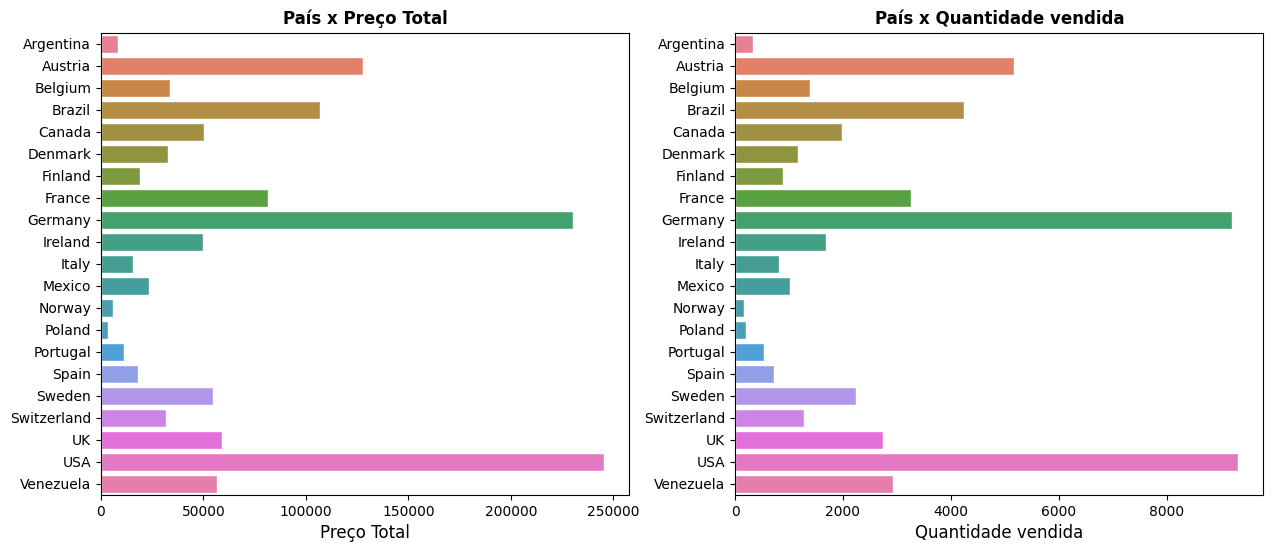

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  graph1 = sns.barplot(sum_country, x='Total Price', y='ship_country', hue='ship_country',ax=axes[0])

  graph1.set_title('País x Preço Total', fontweight='bold')
  graph1.set_xlabel('Preço Total', fontsize=12)
  graph1.set_ylabel('')


with sns.axes_style('whitegrid'):

  graph2 = sns.barplot(sum_country, x='Quantity', y='ship_country', hue='ship_country', ax=axes[1])

  graph2.set_title('País x Quantidade vendida', fontweight='bold')
  graph2.set_xlabel('Quantidade vendida', fontsize=12)
  graph2.set_ylabel('')


> Os dois países que mais se destacam na quantidade de compras realizadas e dinheiro total gasto, respectivamente, Estados Unidos da América e Alemanha.

In [183]:
sum_year = pd.DataFrame()

sum_year['Quantity'] = df_orders[['quantity','ano']].groupby('ano').agg('sum')
sum_year['Total Price'] = df_orders[['total_price','ano']].groupby('ano').agg('sum')

sum_year.sort_values(by='Quantity', ascending=False).head()

,Quantity,Total Price
ano,,
1997,25489,617085.2035
1998,16247,440623.8660
1996,9581,208083.9700


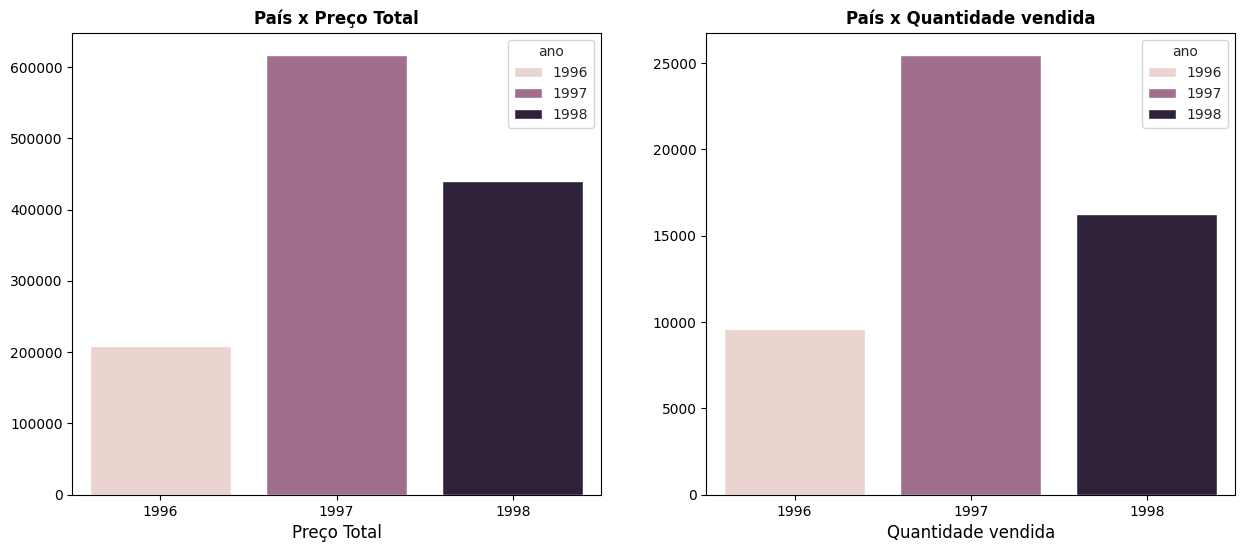

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  graph1 = sns.barplot(sum_year, x='ano',y='Total Price',  hue='ano',ax=axes[0])

  graph1.set_title('País x Preço Total', fontweight='bold')
  graph1.set_xlabel('Preço Total', fontsize=12)
  graph1.set_ylabel('')


with sns.axes_style('whitegrid'):

  graph2 = sns.barplot(sum_year, x='ano',y='Quantity', hue='ano', ax=axes[1])

  graph2.set_title('País x Quantidade vendida', fontweight='bold')
  graph2.set_xlabel('Quantidade vendida', fontsize=12)
  graph2.set_ylabel('')

> No ano de 1997, a empresa Northwind mais que triplicou o faturamento, quando comparado com o ano anterior, já em 1998 houve uma queda de aproximadamente 30% do faturamento de 1997. O gráfico da quantidade de produtos vendidos é quase identico ao grafico do faturamento.

#Insights

* Produtos Mais Vendidos e Maior Faturamento:
    * Bebidas (Beverages) são o produto mais vendido em quantidade e geram o maior faturamento comparado com outros produtos.
    * Côte de Blaye é a bebida que gera o maior faturamento.
    * Rhönbräu Klosterbier é a bebida mais vendida em quantidade, seguida de perto por Guaraná Fantástica.

* Desempenho por País:
    * Estados Unidos da América é o país com a maior quantidade de compras realizadas.
    * Alemanha é o país com o maior total de dinheiro gasto.

* Desempenho da Northwind Traders :
    * Triplicou seu faturamento no ano de 1997 quando comparado com 1996.
    * Queda de aproximadamente 30% do faturamento no ano de 1998.